In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
import scipy

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras,scipy:
    print(module.__name__, module.__version__)

2.6.0
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.3.4
sklearn 0.22.1
tensorflow 2.6.0
keras.api._v2.keras 2.6.0
scipy 1.10.1


In [3]:
# layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape=(None, 5)) #input_shape我们往往第一层指定
# layer是输入为5，输出为100的全连接层，所以对于输入为10x5的矩阵来看，会乘以一个5x100的矩阵，所以输出就是10x100.
print(type(layer))
layer(tf.ones([10, 5]))  #这里是对应层的输出,ones指的是生成的全1

<class 'tensorflow.python.keras.layers.core.Dense'>


<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[ 0.00620568,  0.10504319, -0.1510228 , -0.39332545, -0.13948882,
         0.7407291 ,  0.26630294,  0.10497224, -0.22290732,  0.04776783,
         0.09320278, -0.10885094,  0.18136798, -0.4951422 ,  0.06692342,
        -0.36617953,  0.06727546, -0.28537923,  0.08831498, -0.22020727,
        -0.3710868 ,  0.23383416, -0.02639592, -0.14990203,  0.16851117,
        -0.22224273,  0.06305586,  0.26910186,  0.47776413,  0.21588427,
         0.49921614, -0.4109727 ,  0.0316698 ,  0.09041078, -0.38699424,
        -0.28021443,  0.04421015, -0.6219097 ,  0.15196261,  0.3111313 ,
         0.0976242 ,  0.60399026, -0.17947407,  0.31744766, -0.6268313 ,
         0.46006793, -0.27667713, -0.21671486,  0.3073917 , -0.00478388,
        -0.10304861, -0.1181879 , -0.09142606, -0.8614876 ,  0.01969865,
        -0.32666248,  0.08679712,  0.23732474, -0.14669518,  0.27927548,
         0.02634065,  0.34925488, -0.3400549 , -0.0430028 ,  0.18950005,


In [4]:
#layer.variables 可以打印layer里包含的所有参数
# x * w + b  w就是指层的参数，kernel就是w，b就是bias
print(layer.variables)
print('-'*50)
#获得所有可训练的变量，因为有时可以手动的调一些参数，使得有些参数不可训练
layer.trainable_variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[-0.09665039, -0.17344154, -0.14217305, -0.1427236 , -0.00351886,
         0.16984831, -0.02842535,  0.0812505 , -0.10078821, -0.05696456,
        -0.06073931,  0.00641023,  0.08831199, -0.15139583, -0.07621865,
        -0.23778948, -0.1757366 , -0.10672493, -0.02533267,  0.02210905,
        -0.17427483, -0.20456214,  0.14124082, -0.23710135, -0.08057673,
        -0.13423719, -0.06180577,  0.2050988 , -0.13736735, -0.13193092,
         0.21463685, -0.10782011,  0.20085065, -0.20283759, -0.12084749,
        -0.08196644, -0.15623197, -0.12032669,  0.03014465,  0.1575046 ,
        -0.01243404,  0.08353318, -0.19128524,  0.12621327, -0.16202256,
         0.15971862, -0.17922047, -0.17161447,  0.18028052,  0.16261034,
        -0.04998127, -0.03646174, -0.07113381, -0.20855598,  0.01264782,
         0.01346253,  0.17055236,  0.09213291,  0.14601158,  0.17060871,
        -0.15445954,  0.14664985,  0.05229519, -0.0773

[<tf.Variable 'dense_1/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[-0.09665039, -0.17344154, -0.14217305, -0.1427236 , -0.00351886,
          0.16984831, -0.02842535,  0.0812505 , -0.10078821, -0.05696456,
         -0.06073931,  0.00641023,  0.08831199, -0.15139583, -0.07621865,
         -0.23778948, -0.1757366 , -0.10672493, -0.02533267,  0.02210905,
         -0.17427483, -0.20456214,  0.14124082, -0.23710135, -0.08057673,
         -0.13423719, -0.06180577,  0.2050988 , -0.13736735, -0.13193092,
          0.21463685, -0.10782011,  0.20085065, -0.20283759, -0.12084749,
         -0.08196644, -0.15623197, -0.12032669,  0.03014465,  0.1575046 ,
         -0.01243404,  0.08353318, -0.19128524,  0.12621327, -0.16202256,
          0.15971862, -0.17922047, -0.17161447,  0.18028052,  0.16261034,
         -0.04998127, -0.03646174, -0.07113381, -0.20855598,  0.01264782,
          0.01346253,  0.17055236,  0.09213291,  0.14601158,  0.17060871,
         -0.15445954,  0.14664985,  0.0522

In [5]:
help(layer)

Help on Dense in module tensorflow.python.keras.layers.core object:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor of shape `(1, 1, d1)`
 |  (the

In [6]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [7]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [ ]:
np.log(1+np.exp(2*x))

In [34]:
#使用lamba，一行代码就搞定
# tf.nn.softplus : log(1+e^x)
# 以下是一个softplus函数
customized_softplus = keras.layers.Lambda(lambda x : tf.math.log(1+tf.math.exp(x)))
print(customized_softplus([-10., -5., 0., 5., 10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [10]:
np.log(1+np.exp(-5))

0.006715348489117967

In [5]:
# 列表乘2会增加元素
a = [1,2,3,4,-5]
print(a*2)

[1, 2, 3, 4, -5, 1, 2, 3, 4, -5]


In [25]:
# customized dense layer.
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)  #直接使用tf提供的
        super(CustomizedDenseLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        """构建所需要的参数，也就是kernel还有bias"""
        # x * w + b. input_shape:[None, a] w:[a,b]output_shape: [None, b]
        print('-'*50)
        print(input_shape)
        self.kernel = self.add_weight(name = 'kernel',
                                      shape = (input_shape[1], self.units),
                                      initializer = 'uniform',#使用均匀分布的方法去初始化kernel
                                      trainable = True)
        self.bias = self.add_weight(name = 'bias',
                                    shape = (self.units, ),
                                    initializer = 'zeros',
                                    trainable = True)
        #接着我们要继承父类的build
        super(CustomizedDenseLayer, self).build(input_shape)
    
    def call(self, x):
        """完成正向计算"""
        return self.activation(x @ self.kernel + self.bias)

#完全模仿dense来实现自定义层，因此input_shape传的和dense一致，只需要是特征数，父类Layer自动会转为
#二维的input_shape，然后再传递给build
model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',
                         input_shape=x_train.shape[1:]),  #这里传入的是特征数
#     CustomizedDenseLayer(1),
    #再加一个激活函数层，这个和下面注释的两行等价的
#     customized_softplus,
    CustomizedDenseLayer(1,activation=customized_softplus),
#     keras.layers.Dense(1, activation="softplus"),  #一层
#     keras.layers.Dense(1), keras.layers.Activation('softplus'), #两层
])
model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

--------------------------------------------------
(None, 8)
--------------------------------------------------
(None, 30)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_8 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_9 (Cu (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 10,
                    callbacks = callbacks)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.2062 - val_loss: 0.6788
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5916 - val_loss: 0.5848
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5183 - val_loss: 0.5227
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4734 - val_loss: 0.4820
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4695 - val_loss: 0.4968
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4459 - val_loss: 0.4533
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4377 - val_loss: 0.4431
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4318 - val_loss: 0.4434
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4207 - val_loss: 0.4320
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4073 - val_loss: 0.4301

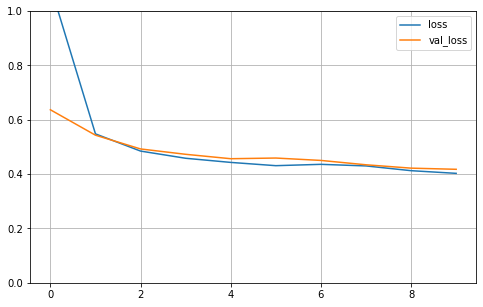

In [20]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [21]:
model.evaluate(x_test_scaled, y_test, verbose=0)

0.4179482161998749